In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/ML_HW1/data_hw1.csv")

In [ ]:
test

,x,y
0,-1.572851,2.927733
1,-2.424197,25.341094
2,0.402431,-8.935209
3,-1.648521,4.257155
4,-1.899214,9.499411
...,...,...
995,-0.388337,-7.106198
996,-1.474044,1.353707
997,-1.799926,7.262406
998,-1.639442,4.091766


In [ ]:
test.isnull().any() #NULL값 테스트

x    False
y    False
dtype: bool

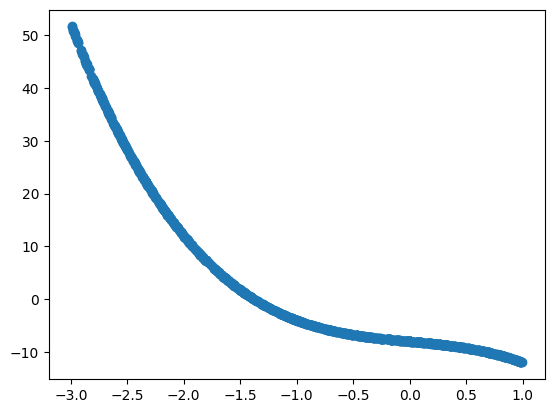

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
x_data = test.x
y_data = test.y
plt.scatter(x_data, y_data)
plt.show() #데이터 모양 확인 -> 선형임을 확인

In [ ]:
#데이터를 매트릭스로 변형
x = np.array(x_data).reshape(len(x_data), 1)
y = np.array(y_data).reshape(len(y_data), 1)
#데이터 확인
print("x : ", x[:10])
print("x shape : ", x.shape)
print("y : ", y[:10])
print("y shape : ", y.shape)

x :  [[-1.57285121]
 [-2.4241968 ]
 [ 0.40243062]
 [-1.64852104]
 [-1.89921403]
 [-2.97595611]
 [ 0.20764787]
 [-1.01036686]
 [-0.84862863]
 [ 0.4836501 ]]
x shape :  (1000, 1)
y :  [[ 2.92773279]
 [25.34109429]
 [-8.93520885]
 [ 4.25715489]
 [ 9.49941096]
 [50.66392018]
 [-8.43320232]
 [-3.91641805]
 [-5.08042801]
 [-9.19356856]]
y shape :  (1000, 1)


In [ ]:
#Task1
#초기 파라메터와 하이퍼 파라메터
a1, b1 = 0, 0
learn_rate, epochs = 0.01, 10000
#Gradient Descent
length = len(x)
for _ in range(epochs):
  y_pred = a1*x + b1
  gradient_a = (2/length) * np.sum((y_pred-y) * x)
  gradient_b = (2/length) * np.sum(y_pred-y)
  a1 -= learn_rate * gradient_a
  b1 -= learn_rate * gradient_b
print("a : ", a1)
print("b : ", b1)

a :  -12.28806905988281
b :  -8.493209154977862


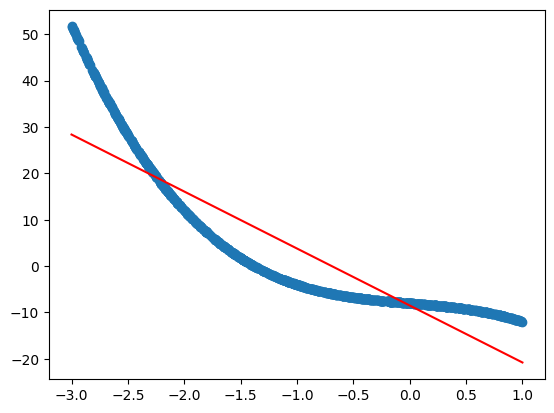

In [ ]:
# 모델 예측 결과 계산
x_pred = np.linspace(-3, 1, 1000)  # 예측을 위한 X값 범위
y_pred = a1*x_pred + b1  # 모델 예측 결과 계산

# 원본 데이터와 모델 예측 결과 그래프로 시각화
plt.scatter(x, y)
plt.plot(x_pred, y_pred, color='red')
plt.show()

In [ ]:
#Task2
#Normal Equation
xx = np.column_stack((x**2, x, np.ones_like(x))) #x와 x제곱, x와 크기가 동일한 상수항1 매트릭스로 xx구성
xx_transpose = np.transpose(xx)
dot_x = np.dot(xx_transpose, xx)
dot_y = np.dot(xx_transpose, y)
theta = np.dot(np.linalg.inv(dot_x), dot_y)
a2, b2, c2 = theta
print("a : ", a2[0])
print("b : ", b2[0])
print("c : ", c2[0])

a :  5.820748931582723
b :  -1.0570819679232146
c :  -10.704822547454388


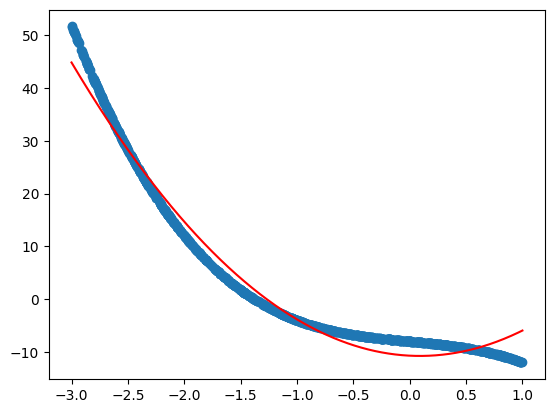

In [ ]:
# 모델 예측 결과 계산
x_pred = np.linspace(-3, 1, 1000)  # 예측을 위한 X값 범위
y_pred = a2*x_pred**2 + b2*x_pred + c2  # 모델 예측 결과 계산

# 원본 데이터와 모델 예측 결과 그래프로 시각화
plt.scatter(x, y)
plt.plot(x_pred, y_pred, color='red')
plt.show()